In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use(["grid", "notebook", "science", "ieee"])

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.iloc[:, :-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
X, y = df.iloc[:, 2:], df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

In [6]:
np.unique(y_train, return_counts=True)

(array(['B', 'M'], dtype=object), array([269, 157], dtype=int64))

In [7]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [8]:
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)
logistic_regression = LogisticRegressionCV(cv=k_fold, random_state=1, max_iter=1000, Cs=np.logspace(np.log10(1e-5), np.log10(1e5), num=20))
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)
logistic_regression.score(X_test_scaled, y_test)

0.972027972027972

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [10]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[87,  1],
       [ 3, 52]], dtype=int64)

In [11]:
cm_normalized = cm / cm.sum(axis=1).reshape(-1, 1)

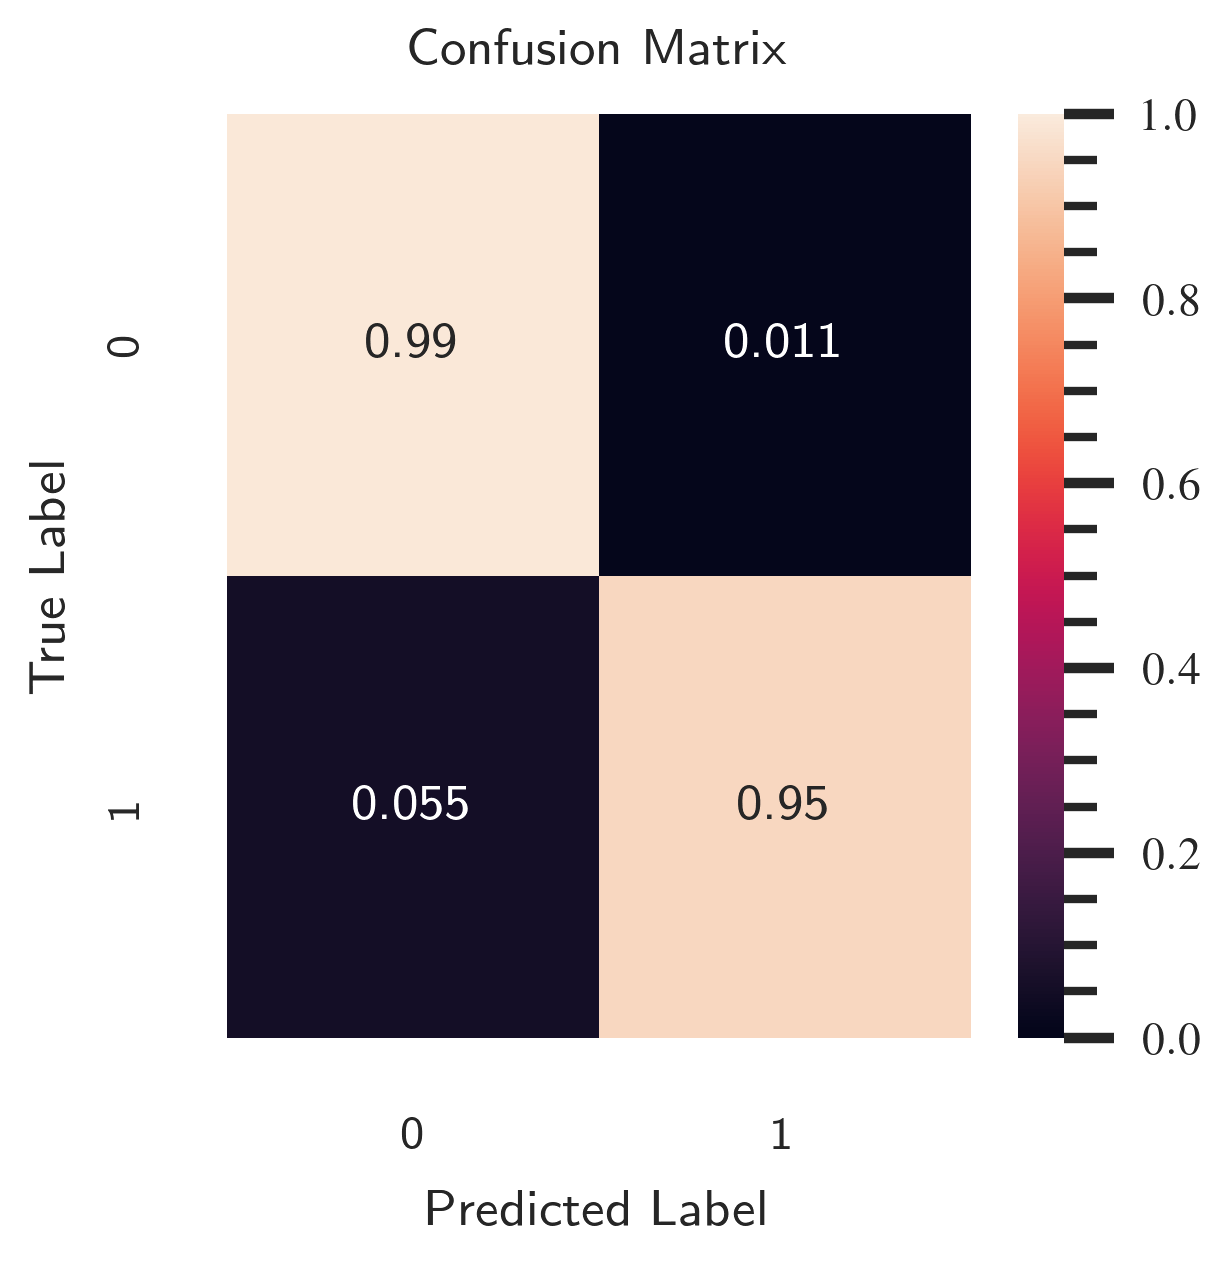

In [12]:
plt.figure(figsize=(2, 2))
sns.set(font_scale=.5)
sns.heatmap(cm_normalized, vmin=0, vmax=1, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
false_positive = cm.sum(axis=0) - np.diag(cm)
false_negative = cm.sum(axis=1) - np.diag(cm)
true_positive = np.diag(cm)
true_negative = cm.sum() - (false_positive + false_negative + true_positive)

In [14]:
true_positive_rate = true_positive / (true_positive + false_negative)
true_positive_rate

array([0.98863636, 0.94545455])

In [15]:
positive_predictive_value = true_positive / (true_positive + false_positive)
positive_predictive_value

array([0.96666667, 0.98113208])

In [16]:
false_positive_rate = false_positive / (false_positive + true_negative)
false_positive_rate 

array([0.05454545, 0.01136364])

In [17]:
false_negative_rate = false_negative / (false_negative + true_positive)
false_negative_rate

array([0.01136364, 0.05454545])

In [18]:
average_true_positive_rate = true_positive_rate.sum() / 2
average_true_positive_rate

0.9670454545454545

In [19]:
average_precision = positive_predictive_value.sum() / 2
average_precision

0.9738993710691823

In [20]:
average_false_negative_rate = false_negative_rate.sum() / 2
average_false_negative_rate

0.03295454545454545

In [21]:
k_fold = KFold(n_splits=10, random_state=2, shuffle=True)
cross_validation_score = cross_val_score(logistic_regression, X_test_scaled, y_test, cv=k_fold)

In [22]:
cross_validation_score.mean()

0.9504761904761905

In [23]:
cross_validation_score.std()

0.045535364144312085